In [ ]:
Case study on Pre-processing 
 
Do the following on titanic dataset. 

.Load the dataset into python environment

.Make ‘PassengerId’ as the index column 

.Check the basic details of the dataset 

.Fill in all the missing values present in all the columns in the dataset 

.Check and handle outliers in at least 3 columns in the dataset 

.Do min max scaling on the feature set (Take ‘Survived’ as target) 


In [76]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1.Load the dataset into python environment

In [77]:
pd.read_csv(r'C:\Users\user\titanic_dataset.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2.Make ‘PassengerId’ as the index column

In [78]:
data=pd.read_csv(r'C:\Users\user\titanic_dataset.csv',index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3.Check the basic details of the dataset 

In [79]:
data.shape

(891, 11)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [81]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

We have 891 observations in dataset.And some missing data in age,cabin and embarked.

In [83]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 4.Fill in all the missing values present in all the columns in the dataset 

In [84]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [85]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [89]:
print(data.Age.mean())
print(data.Age.median())

29.69911764705882
28.0


In [90]:
#filling null values in 'Age' with the median value

data['Age'].fillna(data['Age'].median(),inplace=True)

In [92]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [93]:
##filling null values in 'Cabin','Embarked' with the mode value
#data['Cabin'].fillna(data['Cabin'].mode()[0],inplace=True)
#data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)


for i in ['Cabin','Embarked']:
    data[i]=data[i].fillna(data[i].mode()[0])
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5.Check and handle outliers in at least 3 columns in the dataset 

In [ ]:
#Outliers present in Age,Fare,SibSp

Text(0.5, 1.0, 'Boxplot of Age')

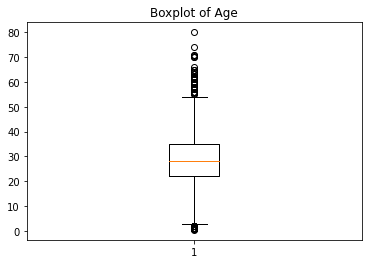

In [94]:
plt.boxplot(data['Age'])
plt.title('Boxplot of Age')

In [20]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [21]:
data['Age'].median()

28.0

In [22]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.5
54.5


In [23]:
outlier=[]
for x in data['Age']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [24]:
#outlier

In [25]:
ind1=data['Age']>up_lim
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [26]:
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

Text(0.5, 1.0, 'Boxplot of Age')

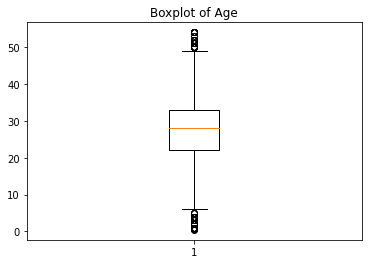

In [28]:
#after solving outliers boxplot of age
plt.boxplot(data['Age'])
plt.title('Boxplot of Age')

In [ ]:
#outliers present in SibSep

Text(0.5, 1.0, 'Boxplot of SibSp')

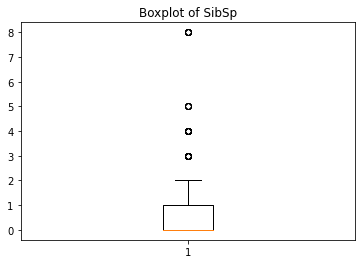

In [101]:
plt.boxplot(data['SibSp'])
plt.title('Boxplot of SibSp')

In [102]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q3)
print(Q3)

0.0
1.0
1.0


In [103]:
#data['SibSp'].median()

In [104]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

-1.5
2.5


In [105]:
outlier=[]
for x in data['SibSp']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [42]:
#outlier

In [106]:
ind1=data['SibSp']>up_lim
data.loc[ind1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [107]:
data.drop([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace=True)

Text(0.5, 1.0, 'Boxplot of SibSp')

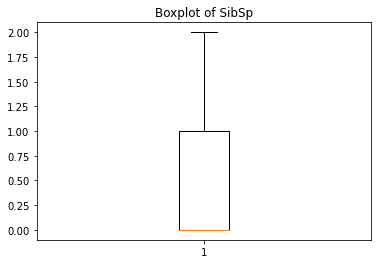

In [108]:
#after sovling outliers

plt.boxplot(data['SibSp'])
plt.title('Boxplot of SibSp')

In [ ]:
#outliers present in Fare

Text(0.5, 1.0, 'Boxplot of Fare')

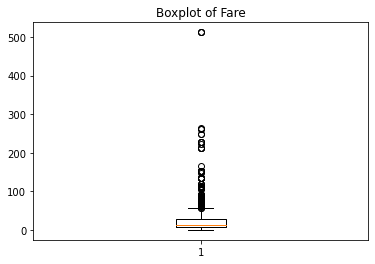

In [158]:
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare')

In [159]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.8958
13.0
27.7208


In [160]:
IQR=q3-q1
print(IQR)
low_lim=q1-1.5*IQR
upp_lim=q3+1.5*IQR
print(low_lim)
print(upp_lim)

23.0896
-26.724
65.6344


In [161]:
outlier=[]
for x in data['Fare']:
    if((x>upp_lim) or (x<low_lim)):
        outlier.append(x)

In [162]:
ind1=data['Fare']>upp_lim
data.loc[ind1].index

Int64Index([119, 121, 125, 140, 152, 196, 216, 219, 225, 231, 246, 257, 258,
            259, 263, 269, 270, 276, 291, 292, 298, 300, 306, 307, 308, 311,
            312, 319, 320, 326, 333, 335, 337, 338, 367, 370, 374, 376, 378,
            381, 386, 391, 394, 413, 436, 439, 446, 454, 485, 487, 497, 499,
            505, 506, 521, 528, 538, 541, 545, 551, 558, 559, 582, 586, 588,
            592, 610, 628, 642, 646, 656, 660, 661, 666, 680, 682, 690, 699,
            701, 709, 717, 731, 738, 742, 743, 746, 760, 764, 766, 780, 790],
           dtype='int64', name='PassengerId')

In [163]:
data.drop([ 119, 121, 125, 140, 152, 196, 216, 219, 225, 231, 246, 257, 258,
            259, 263, 269, 270, 276, 291, 292, 298, 300, 306, 307, 308, 311,
            312, 319, 320, 326, 333, 335, 337, 338, 367, 370, 374, 376, 378,
            381, 386, 391, 394, 413, 436, 439, 446, 454, 485, 487, 497, 499,
            505, 506, 521, 528, 538, 541, 545, 551, 558, 559, 582, 586, 588,
            592, 610, 628, 642, 646, 656, 660, 661, 666, 680, 682, 690, 699,
            701, 709, 717, 731, 738, 742, 743, 746, 760, 764, 766, 780, 790 ],inplace=True)

Text(0.5, 1.0, 'Boxplot of Fare')

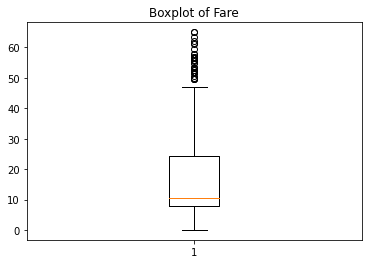

In [164]:
#after solving outliers

plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare')

# 6.Do min max scaling on the feature set (Take ‘Survived’ as target) 

In [167]:
x=data['Survived']
x=pd.DataFrame(x)
type(x)
#x.describe

pandas.core.frame.DataFrame

In [147]:
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)

In [148]:
x=pd.DataFrame(x)
x.describe()

,0
count,845.00000
mean,0.39645
std,0.48945
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000
